In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# load the data
df=pd.read_csv('FB.csv')   #3 months data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-26,197.190002,201.210007,195.490005,197.199997,197.199997,16524500
1,2020-02-27,191.820007,195.880005,189.500000,189.750000,189.750000,21682600
2,2020-02-28,182.699997,192.740005,181.820007,192.470001,192.470001,32583500
3,2020-03-02,194.029999,196.570007,188.850006,196.440002,196.440002,24949000
4,2020-03-03,196.220001,197.240005,183.970001,185.889999,185.889999,27984100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       42 non-null     object 
 1   Open       42 non-null     float64
 2   High       42 non-null     float64
 3   Low        42 non-null     float64
 4   Close      42 non-null     float64
 5   Adj Close  42 non-null     float64
 6   Volume     42 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
# create the lists of X and Y
dates=[]  #dependent variable ( Date )
prices=[]   # independent variable ( open )

In [5]:
df.shape  # some data are missing but its not a problem

(42, 7)

In [6]:
# print the last row of the data which we will test on
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
41,2020-04-24,183.229996,190.410004,180.830002,190.070007,190.070007,28792000


In [7]:
# get all the data excpet last row
df=df.head(len(df)-1)
print(df.shape)

(41, 7)


In [8]:
df_dates=df.loc[:,'Date']  #get all rows from date column
df_open=df.loc[:,'Open']   #get all the rows from open column

In [9]:
for date in df_dates:
    dates.append([int(date.split('-')[2])])
    
# create a dependent variables Y prices
for open_price in df_open:
    prices.append(float(open_price))

In [10]:
# function to predict using SVR models with 3 diffrent kernels
def predict_prices(dates,prices,x):
    
    svr_lin=SVR(kernel='linear',C=103)
    svr_poly=SVR(kernel='poly',C=103,degree=3)
    svr_rbf=SVR(kernel='rbf',C=103,gamma=0.1)
    
#Train the models on the dates and prices

    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)


#plot the model to see which has the best fit

    plt.scatter(dates,prices,color='black',label='Data')
    plt.scatter(dates,svr_rbf.predict(dates),color='red',label='RBF model')
    plt.scatter(dates,svr_lin.predict(dates),color='green',label='Linear model')
    plt.scatter(dates,svr_poly.predict(dates),color='blue',label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector regressor')
    plt.show()

    # returning all 3 model prediction
    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0]

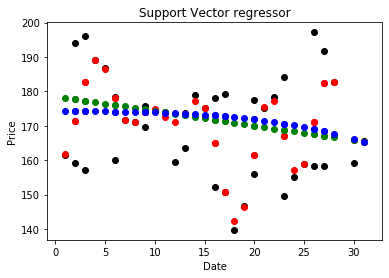

(167.16029468560748, 168.79199560003534, 170.6082788813157)


In [11]:
# predict the price of FB on day 31
predicted_price=predict_prices(dates,prices,[[23]])

print(predicted_price)